In [1]:
import folium
from datosgobmx import client
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt

In [2]:
dir_ext = '../data/external/INEGI/'
mx_mun = pd.read_csv(dir_ext+'CentroidMunicipalities_INEGI19_v1.csv', encoding ='latin_1')


In [4]:
mx_mun

,CVEGEO,CVE_ENT,CVE_MUN,NOMGEO,lat,long
0,1001,1,1,Aguascalientes,21.847519,-102.305481
1,1002,1,2,Asientos,22.132107,-102.095255
2,1003,1,3,Calvillo,21.910832,-102.713602
3,1004,1,4,Cosío,22.370516,-102.312008
4,1005,1,5,Jesús María,21.934556,-102.468451
...,...,...,...,...,...,...
2458,32054,32,54,Villa Hidalgo,22.406697,-101.722249
2459,32055,32,55,Villanueva,22.335301,-102.843352
2460,32056,32,56,Zacatecas,22.729331,-102.668598
2461,32057,32,57,Trancoso,22.756817,-102.321713


In [4]:
dir_pcs = '../data/processed/'
aqip_mx = pd.read_csv(dir_pcs+'aqip/MX_PM10_2017-2020.csv', encoding='latin_1').set_index('Date')


In [20]:
aqip_mx

,Aguascalientes,Chihuahua,Cuernavaca,Ecatepec de Morelos,Guadalajara,Mexico City,Monterrey,Morelia,Mérida,Oaxaca,Pachuca de Soto,Puebla,San Luis Potosí,Tepic,Toluca
Date,,,,,,,,,,,,,,,
2017-01-01,971.000000,21.600000,54.000000,NaN,43.200000,52.920000,NaN,69.142857,NaN,73.183673,10.800000,NaN,37.800000,43.200000,49.680000
2017-01-02,560.479592,27.000000,45.900000,NaN,46.980000,48.060000,NaN,72.173469,NaN,58.191837,7.020000,NaN,34.560000,41.580000,52.340000
2017-01-03,444.176871,37.006803,48.600000,NaN,52.347211,53.067211,NaN,83.285714,NaN,58.474830,5.400000,NaN,46.087619,45.360000,58.614422
2017-01-04,359.005102,42.515306,49.140000,NaN,58.566531,54.560612,NaN,88.841837,NaN,56.816122,4.320000,NaN,51.851429,48.275102,62.256735
2017-01-05,301.436735,43.300245,49.248000,NaN,57.853224,55.860735,NaN,93.791837,NaN,56.252898,4.320000,NaN,235.881143,51.640490,64.442122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-27,29.160000,NaN,41.040000,NaN,34.714286,52.349271,35.948571,38.417143,NaN,84.440233,36.257143,65.454344,37.337143,44.711487,60.244315
2020-05-28,31.165714,NaN,39.188571,NaN,38.097143,50.320350,33.634286,39.034286,NaN,80.500058,35.485714,56.632653,37.954286,46.934577,57.935277
2020-05-29,33.017143,NaN,37.182857,NaN,42.345889,47.388921,31.165714,38.880000,NaN,70.249913,33.634286,49.726414,36.411429,50.640700,55.940991


In [5]:
cty_aqip = [c for c in aqip_mx.columns]
cty_aqip

['Aguascalientes',
 'Chihuahua',
 'Cuernavaca',
 'Ecatepec de Morelos',
 'Guadalajara',
 'Mexico City',
 'Monterrey',
 'Morelia',
 'Mérida',
 'Oaxaca',
 'Pachuca de Soto',
 'Puebla',
 'San Luis Potosí',
 'Tepic',
 'Toluca']

In [15]:
mx_mun[mx_mun['NOMGEO']==cty_aqip[1]]

,CVEGEO,CVE_ENT,CVE_MUN,NOMGEO,lat,long
0,1001,1,1,Aguascalientes,21.847519,-102.305481


In [17]:
def visualize_mx_aqip(pollutant, date):

    
    
    dir_ext = '../data/external/INEGI/'
    
    dir_pcs = '../data/processed/'
    
    mx_mun = pd.read_csv(dir_ext+'CentroidMunicipalities_INEGI19_v1.csv', encoding ='latin_1')
    
    aqip_mx = pd.read_csv(dir_pcs+'aqip/MX_'+pollutant+'_2017-2020.csv', encoding='latin_1').set_index('Date')
    
    
    centro_lat, centro_lon = 22.396092, -101.731430 #Centro del mapa

    #Creacion del mapa
    folium_map = folium.Map(location=[centro_lat,centro_lon], zoom_start=5,
                            tiles = 'cartodb positron')
    
    cty_aqip = [c for c in aqip_mx.columns]
    
    for i in range(1,len(cty_aqip)):
        
        city = cty_aqip[i]
        
        if city == 'Oaxaca':
            city = 'Oaxaca de Juárez'
        
        elif city == 'Mexico City':
            city = 'Ciudad de México'
        
        c_value = aqip_mx.loc[date,cty_aqip[i]]
        
        lat = float(mx_mun[mx_mun['NOMGEO']==city].lat)
        #lat = lat[mx_mun[mx_mun['NOMGEO']==cty_aqip[i]].index.values[0]]
        
        long = float(mx_mun[mx_mun['NOMGEO']==city].long)
        #long = long[mx_mun[mx_mun['NOMGEO']==cty_aqip[i]].index.values[0]]
 
        #Puntos con nombre, latitud y longitud
        popup_text = f"<b> Nombre: </b> {city} <br> <b> Latitud: </b> {lat:.5f} <br> <b> Longitud: </b> {long:.5f} <br> <b> Contaminante: </b> {pollutant} <br> <b> Conc: </b> {c_value} <br>"

        #Coloca los marcadores en el mapa
        folium.CircleMarker(location=[lat, long], radius=5,
                            tooltip = popup_text, fill=True, color='blue',
                            fill_opacity=0.65).add_to(folium_map)

    return(folium_map)

In [23]:
c_value = aqip_mx.loc['2020-05-31',cty_aqip[1]]

In [24]:
c_value

31.78285714285759

In [25]:
centro_lat, centro_lon = 22.396092, -101.731430 #Centro del mapa

In [39]:
folium_map = folium.Map(location=[centro_lat,centro_lon], zoom_start=5,
                            tiles = 'cartodb positron')

In [40]:
#Puntos con nombre, latitud y longitud
popup_text = f"<b> Nombre: </b> {cty_aqip[1]} <br> <b> Latitud: </b> {float(mx_mun[mx_mun['NOMGEO']==cty_aqip[1]].lat):.5f} <br> <b> Longitud: </b> {float(mx_mun[mx_mun['NOMGEO']==cty_aqip[1]].long):.5f} <br> <b> Contaminante: </b> {'PM10'} <br> <b> Conc: </b> {c_value} <br>"

In [41]:
folium.CircleMarker(location=[float(mx_mun[mx_mun['NOMGEO']==cty_aqip[1]].lat), float(mx_mun[mx_mun['NOMGEO']==cty_aqip[1]].long)], radius=10,
                            tooltip = popup_text, fill=True, color='blue',
                            fill_opacity=0.65).add_to(folium_map)

In [42]:
folium_map

In [44]:
for i in range(1,len(cty_aqip)):
    print (cty_aqip[i])

Aguascalientes
Chihuahua
Cuernavaca
Ecatepec de Morelos
Guadalajara
Mexico City
Monterrey
Morelia
Mérida
Oaxaca
Pachuca de Soto
Puebla
San Luis Potosí
Tepic
Toluca


In [21]:
visualize_mx_aqip('O3', '2020-05-30')

In [58]:
lat = float(mx_mun[mx_mun['NOMGEO']==cty_aqip[2]].lat)
lat

28.93876403

In [22]:
def compare_mx_aqip(pollutant, date):

    
    
    dir_ext = '../data/external/INEGI/'
    
    dir_pcs = '../data/processed/'
    
    mx_mun = pd.read_csv(dir_ext+'CentroidMunicipalities_INEGI19_v1.csv', encoding ='latin_1')
    
    aqip_mx = pd.read_csv(dir_pcs+'aqip/MX_'+pollutant+'_2017-2020.csv', encoding='latin_1').set_index('Date')
    
    prev_year = str(int(date[:4])-1)+date[4:]
    
    centro_lat, centro_lon = 22.396092, -101.731430 #Centro del mapa

    #Creacion del mapa
    folium_map = folium.Map(location=[centro_lat,centro_lon], zoom_start=5,
                            tiles = 'cartodb positron')
    
    cty_aqip = [c for c in aqip_mx.columns]
    
    for i in range(1,len(cty_aqip)):
        
        city = cty_aqip[i]
        
        if city == 'Oaxaca':
            city = 'Oaxaca de Juárez'
        
        elif city == 'Mexico City':
            city = 'Ciudad de México'
        
        c_current = aqip_mx.loc[date,cty_aqip[i]]
        c_prev = aqip_mx.loc[prev_year,cty_aqip[i]]
        c_graph = (c_current - c_prev)/c_prev
        
        lat = float(mx_mun[mx_mun['NOMGEO']==city].lat)
        #lat = lat[mx_mun[mx_mun['NOMGEO']==cty_aqip[i]].index.values[0]]
        
        long = float(mx_mun[mx_mun['NOMGEO']==city].long)
        #long = long[mx_mun[mx_mun['NOMGEO']==cty_aqip[i]].index.values[0]]
 
        #Puntos con nombre, latitud y longitud
        popup_text = f"<b> Nombre: </b> {city} <br> <b> Latitud: </b> {lat:.5f} <br> <b> Longitud: </b> {long:.5f} <br> <b> Contaminante: </b> {pollutant} <br> <b> Conc: </b> {c_graph} <br>"

        #Coloca los marcadores en el mapa
        folium.CircleMarker(location=[lat, long], radius=5,
                            tooltip = popup_text, fill=True, color='blue',
                            fill_opacity=0.65).add_to(folium_map)

    return(folium_map)

In [24]:
compare_mx_aqip('PM10', '2020-05-30')

In [86]:
def pollutant(p):
    """Function that returns a str with a pollutant.

    Args:
        p (int): values from 0 to 5 for list place.

    Returns:
        str: pollutant.
    """
    #Parametros de contaminantes
    param = ['CO','NO2', 'O3','PM10','SO2']
    return (param[p])

def aqip_yearly():
    """Creates a graph that compares the air quality data for each pollutant from 2017 to 2020

    Args:
        city (str): code for the city to be analysed, for example: cdmx
    """
    dir_pcs = '../data/processed/aqip/'
    dir_fig = '../output/figures/aqip_yearly/'


    years = [2017, 2018, 2019, 2020] #Years to be referenced

    year_dict = {2017:'green', 2018:'blue',
                2019:'orange', 2020:'red'}
    
    
    for i in range(5):
        
        aqip_mx = pd.read_csv(dir_pcs+'MX_'+pollutant(i)+'_'+str(years[0])+'-'+str(years[len(years)-1])+'_raw.csv',
                 encoding='latin_1')
        
        aqip_mx['Date'] = pd.to_datetime(aqip_mx['Date'])
        
        aqip_mx = aqip_mx.set_index('Date')
        
        cty_aqip = [c for c in aqip_mx.columns]
        
        
        for c in cty_aqip:
            
            cty_data = aqip_mx.loc[:,c]
            
            cty_data = cty_data.reset_index()
        
            ax = plt.gca()

            for y in years:
                
                filter_year=cty_data[cty_data['Date'].dt.year==y]
                
                #print (filter_year)

                filter_year['Date'] = filter_year['Date'].dt.strftime('%m-%d')

                #print(filter_year)

                filter_year.plot(x='Date',y=c, color=year_dict[y], label = str(y), ax=ax)
                #filter_year['Date'].dt.strftime('%m-%d').plot(x='Date',y=c, color=year_dict[y], label = str(y), ax=ax)
            
            plt.ylabel('Concentration: '+pollutant(i))

            plt.savefig(dir_fig+c+'_Year_Compare_'+pollutant(i)+'.png')

            ax.clear()

<ipython-input-86-60d31ed17ce8>:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter_year['Date'] = filter_year['Date'].dt.strftime('%m-%d')
<ipython-input-86-60d31ed17ce8>:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter_year['Date'] = filter_year['Date'].dt.strftime('%m-%d')
<ipython-input-86-60d31ed17ce8>:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

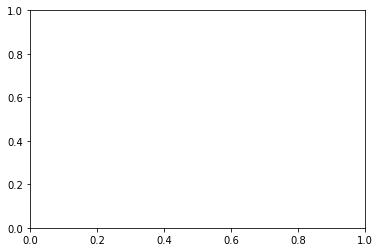

In [87]:
aqip_yearly()

In [47]:
dir_pcs = '../data/processed/aqip/'
aqip_mx = pd.read_csv(dir_pcs+'MX_PM10_2017-2020_raw', encoding='latin_1')


AttributeError: 'numpy.ndarray' object has no attribute 'list'

In [50]:
for c in cty_aqip:
    print (c)

Guadalajara
Mexico City
Morelia
Chihuahua
Toluca
Pachuca de Soto
Ecatepec de Morelos
Cuernavaca
Puebla
MÃ©rida
San Luis PotosÃ­
Monterrey
Tepic
Aguascalientes
Oaxaca
